In [7]:
#Import the important libraries

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Load the fashion mnist datasets

fashion_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

In [9]:
#Define the label names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
#Explort the dataset
print("The number of training images are : " + str(train_images.shape)) 

The number of training images are : (60000, 28, 28)


In [12]:
print("The number of training labels are: " + str(train_labels.shape))

The number of training labels are: (60000,)


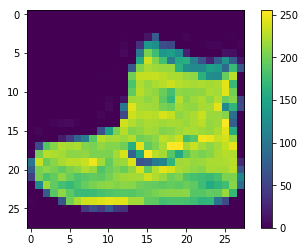

In [13]:
#Read and display one of the images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#Scale images so that pixel values range between 0 and 1 by 255
train_images = train_images / 255.0

test_images = test_images / 255.0

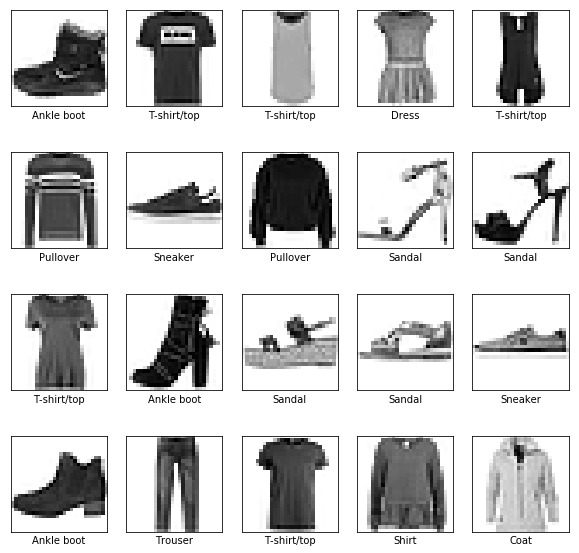

In [16]:
#Read and display first 20 images
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
#Build model by stacking the network layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Reformats 2D numpy array into 1D(28*28 = 784)
    keras.layers.Dense(128, activation='relu'), #This is a learning layer of 128 neurons
    keras.layers.Dense(10)                      #Last layer returns an array of probability scores
])

In [19]:
#Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
#Set number of epochs and train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.5046 - accuracy: 0.8229
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3768 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3398 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3163 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2955 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2831 - accuracy: 0.8954
Epoch 7/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2697 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2595 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2503 - accuracy: 0.9071
Epoch 10/10


In [21]:
#Evaluate the model accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3350 - accuracy: 0.8850

Test accuracy: 0.885


In [22]:
#Build a probability model and use it to predict on test images
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
#make predictions
predictions = probability_model.predict(test_images)

In [25]:
predictions[0]               `#Make a prediction for the image located at index 0

array([8.4153115e-08, 2.8624173e-08, 1.1829519e-08, 5.7276775e-08,
       7.0761073e-09, 2.0221400e-03, 8.1756125e-06, 9.6890228e-03,
       7.1924809e-08, 9.8828042e-01], dtype=float32)

In [26]:
#Determine which label has the highest probability values
np.argmax(predictions[0])

9

In [27]:
#Predict labels for 10 images
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

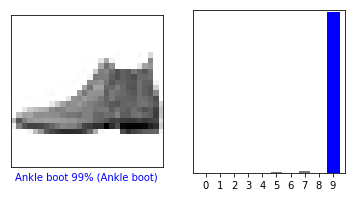

In [28]:
#Verify the predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

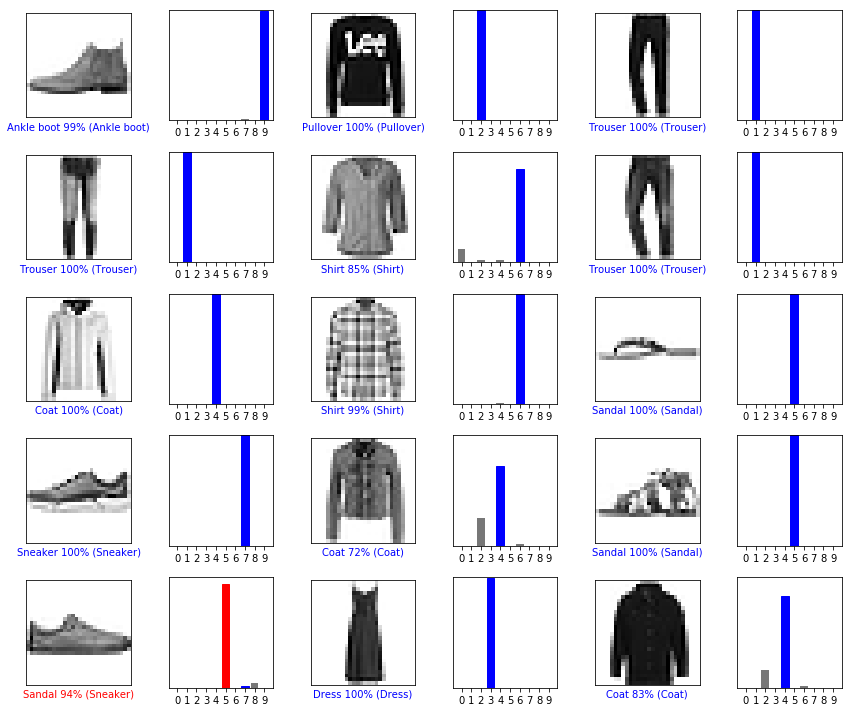

In [29]:
#Predict labels for several images
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [30]:
#Now we can use the trained model to predict on a single image 

img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
#Now predict correct label for the image
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.7228799e-06 2.7776172e-14 9.9980718e-01 2.9039720e-12 1.5081915e-04
  7.4448104e-14 3.8251972e-05 8.7856130e-17 2.0204764e-10 1.7716753e-12]]


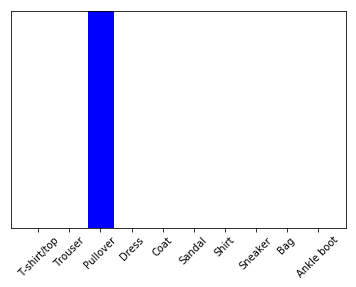

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])


2

In [35]:
#And the model predicted the above image correctly as expected